
Умова: [3, 7, 6, 3, 4, 4, 7, 9, 4, 5, 5, 5, 3, 7, 8, 4, 9, 7, 7, 4, 8, 5, 3, 4, 7, 6, 7, 9, 6, 5]

Варіаційний ряд: [3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9]
Частотна таблиця: значення-частота
3    4
4    6
5    5
6    3
7    7
8    2
9    3
dtype: int64


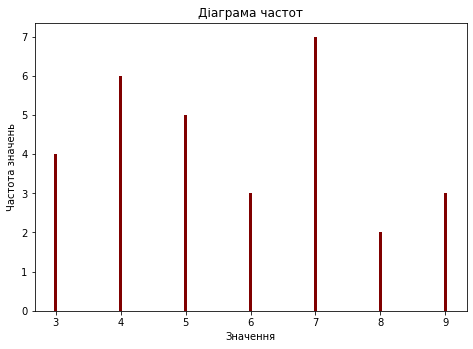

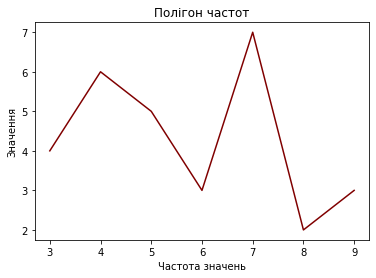

---Числові характеристики---
Середнє арифметичне = 5.7
Мода = 7
Медіана = 5.5
Девіація = 104.3
Варіанса = 3.596551724137931
Дисперсія = 3.4766666666666666
Стандарт = 1.8964576779190014
Розмах = 6
Варіація = 0.33271187331912305
Середньоквадратичне відхилення = 1.8645821694595994
Емпірична функція Fn(x)
 3    0.133333
4    0.333333
5    0.500000
6    0.600000
7    0.833333
8    0.900000
9    1.000000
dtype: float64
Довжина класу = 1.5
[[3, 4.5], [4.5, 6.0], [6.0, 7.5], [7.5, 9.0]]


In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import randint
import matplotlib.pyplot as plt
import math 
%matplotlib inline

mylist = [3,7,6,3,4,4,7,9,4,5,5,5,3,7,8,4,9,7,7,4,8,5,3,4,7,6,7,9,6,5]
n = 30
data = pd.Series(mylist)
print("\nУмова:", data.tolist())
'''
a = int(input("Введіть a: "))
b = int(input("Введіть b: "))
n = int(input("Введіть n: "))

data = pd.Series(np.random.randint(a,b,size=n))
print("\nУмова:", data.tolist())
'''

sort_data = sorted(data)
print("\nВаріаційний ряд:", sort_data)

print("Частотна таблиця: значення-частота")
table = data.value_counts().sort_index()
print(table)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Діаграма частот')
ax.set_ylabel('Частота значень')
ax.set_xlabel('Значення')
i = table.index
v = table.values
ax.bar(i,v, color ='maroon', width = 0.05)
plt.show()

plt.plot(i, v, c="maroon")
plt.title('Полігон частот')
plt.xlabel('Частота значень')
plt.ylabel('Значення')
plt.show()

print("---Числові характеристики---")  

avg_data = sum(data) / n
print("Середнє арифметичне =", avg_data)

d = Counter(data)
get_mode = dict(d)
mode = [k for k, v in get_mode.items() if v == max(list(d.values()))]
if len(mode) == n:
    get_mode = "Моду не знайдено"
else:
    get_mode = "Мода = " + ', '.join(map(str, mode))
print(get_mode)  

if n%2 == 0:
    median1 = sort_data[n//2]
    median2 = sort_data[n//2 - 1]
    median = (median1 + median2)/2
else:
    median = sort_data[n//2]
print("Медіана =", median)  

def deviation(datas):
    d = [(x - avg_data) ** 2 for x in datas]
    return sum(d)
print("Девіація =", deviation(data))  

def variance(datas):
    return (deviation(data) / (n-1))
print("Варіанса =", variance(data))  

def dyspersiia(datas):
    return (deviation(data) / n)
print("Дисперсія =", dyspersiia(data))  

def standart(datas):
    return (+math.sqrt(variance(data)))
print("Стандарт =", standart(data)) 

p = max(data) - min(data) 
print("Розмах =", p)

def variation(datas):
    return (standart(datas)/avg_data)
print("Варіація =", variation(data)) 

def standard_deviation(datas):
    return (math.sqrt(dyspersiia(data)))
print("Середньоквадратичне відхилення =", standard_deviation(data))  

def empirical_function(datas):
    return np.cumsum(table)/ n
print("Емпірична функція Fn(x)\n", empirical_function(data))

#m = int(input("Введіть m: "))
m = 4
d = p/m
print("Довжина класу =", d)

intervals = []
sum = min(data)
while sum != max(data):
    interval = []
    interval.append(round(sum, 2))
    sum+=d
    interval.append(round(sum, 2))
    intervals.append(interval)
print(intervals)

In [9]:
import numpy as np
import pandas as pd
from collections import Counter
from random import randint
import matplotlib.pyplot as plt
import math 
from scipy.stats import binom
%matplotlib inline


#mylist = [3,9,15,21,29]
#chastota = [99,45,25,22,9]
mylist = [1,2,5]
chastota = [3,6,1]
n = sum(chastota)

mylist = pd.Series(mylist, name='значення')
chastota = pd.Series(chastota, name='частота')

print("Частотна таблиця:")

data = pd.concat([mylist, chastota], axis=1)
data = data.apply(pd.to_numeric)
print(data)

print("n =", n)

a_data = chastota * mylist
avg_data = sum(a_data)/ int(n)
print("Середнє арифметичне (~x) =", avg_data)

def deviation(datas):
    d = chastota * (mylist - avg_data)**2
    return sum(d)
print("Девіація (dev) =", deviation(data))  

def variance(datas):
    return (deviation(data) / (n-1))
print("Варіанса (s^2) =", variance(data))  

def dyspersiia(datas):
    return (deviation(data) / n)
print("Дисперсія (D) =", dyspersiia(data))  

def standart(datas):
    return (+math.sqrt(variance(data)))
print("Стандарт (s) = ", standart(data)) 

def variation(datas):
    return (standart(datas)/avg_data)
print("Варіація (v) =  ", variation(data)) 

def standard_deviation(datas):
    return (math.sqrt(dyspersiia(data)))
print("Середньоквадратичне відхилення (σ) =", standard_deviation(data)) 


pi = [0.38,0.17,0.12,0.1,0.23]
print("pi =", pi)

npi = [element * n for element in pi]
#npi = [108.4,49.6,22.8,19.2]

print("npi =", npi)

def kryterii_pirsona(datas):
    d = ((chastota - npi)**2)/(npi)
    return sum(d)
print("Критерій Пірсона (X^2) =", kryterii_pirsona(data)) 


Частотна таблиця:
   значення  частота
0         1        3
1         2        6
2         5        1
n = 10
Середнє арифметичне (~x) = 2.0
Девіація (dev) = 12.0
Варіанса (s^2) = 1.3333333333333333
Дисперсія (D) = 1.2
Стандарт (s) =  1.1547005383792515
Варіація (v) =   0.5773502691896257
Середньоквадратичне відхилення (σ) = 1.0954451150103321
pi = [0.38, 0.17, 0.12, 0.1, 0.23]
npi = [3.8, 1.7000000000000002, 1.2, 1.0, 2.3000000000000003]


ValueError: operands could not be broadcast together with shapes (3,) (5,) 

In [4]:
from scipy.stats import binom
def binomial_distribution(n_, p):
    n_values = list(range(n_ + 1))
    dist = [binom.pmf(r, n_, p) for r in n_values ]
    print("Біномний розподіл:")
    print("n\tp(n)")
    for i in range(n_ + 1):
        print(str(n_values[i]) + "\t" + str(dist[i]))
binomial_distribution(5, 0.25)

Біномний розподіл:
n	p(n)
0	0.2373046875
1	0.39550781250000006
2	0.26367187499999983
3	0.08789062499999994
4	0.014648437499999998
5	0.0009765625


In [6]:
import numpy as np
import pandas as pd
from collections import Counter
from random import randint
import matplotlib.pyplot as plt
import math 
from scipy.stats import binom
%matplotlib inline


mylist = [-2,0,2,3]
chastota = [1,4,5,10]
n = sum(chastota)


mylist = pd.Series(mylist, name='значення')
chastota = pd.Series(chastota, name='частота')

print("Частотна таблиця:")

data = pd.concat([mylist, chastota], axis=1)
data = data.apply(pd.to_numeric)
print(data)

a_data = chastota * mylist
avg_data = sum(a_data)/ int(n)
print("Середнє арифметичне (~x) =", avg_data)

def deviation(datas):
    d = chastota * (mylist - avg_data)**2
    return sum(d)
print("Девіація (dev) =", deviation(data))  

def variance(datas):
    return (deviation(data) / (n-1))
print("Варіанса (s^2) =", variance(data))  

def dyspersiia(datas):
    return (deviation(data) / n)
print("Дисперсія (D) =", dyspersiia(data))  

def standart(datas):
    return (+math.sqrt(variance(data)))
print("Стандарт (s) = ", standart(data)) 

def variation(datas):
    return (standart(datas)/avg_data)
print("Варіація (v) =  ", variation(data)) 

def standard_deviation(datas):
    return (math.sqrt(dyspersiia(data)))
print("Середньоквадратичне відхилення (σ) =", standard_deviation(data)) 

pi = [0.52822,0.3087,0.1323,0.02835,0.00243]
print("pi =", pi)

npi = [element * n for element in pi]
print("npi =", npi)

def kryterii_pirsona(datas):
    d = ((chastota - npi)**2)/(npi)
    return sum(d)
print("Критерій Пірсона (X^2) =", kryterii_pirsona(data)) 

Частотна таблиця:
   значення  частота
0        -2        1
1         0        4
2         2        5
3         3       10
Середнє арифметичне (~x) = 1.9
Девіація (dev) = 41.8
Варіанса (s^2) = 2.1999999999999997
Дисперсія (D) = 2.09
Стандарт (s) =  1.4832396974191324
Варіація (v) =   0.7806524723258592
Середньоквадратичне відхилення (σ) = 1.445683229480096
pi = [0.52822, 0.3087, 0.1323, 0.02835, 0.00243]
npi = [10.564400000000001, 6.1739999999999995, 2.646, 0.567, 0.0486]


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

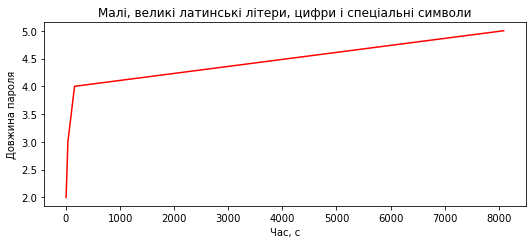

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50] 
plt.rcParams["figure.autolayout"] = True

x = np.array([1,34,157,8092])
y = np.array([2,3,4,5])

plt.title("Малі, великі латинські літери, цифри і спеціальні символи")
plt.xlabel('Час, с')
plt.ylabel('Довжина пароля')
plt.plot(x, y, color="red")

plt.show()